In [68]:
import re
import pandas as pd
import numpy as np

### Inputs

In [126]:
estado = "SP"
entrega_n = "Completa"

input_path   = f"./meta/{estado}/Seguradoras/Entrega {entrega_n}/metadata_1st.csv"
out_file     = f"./output/{estado}/Seguradoras/Entrega {entrega_n}/Dados 1ra Instancia.xlsx"
missing_file = f"./output/{estado}/Seguradoras/Entrega {entrega_n}/missing_processos.txt"

In [127]:
data = pd.read_csv(input_path, sep=";")

In [128]:
data

,PROCESSO,CLASSE,SITUACAO,ASSUNTO,FORO,VARA,JUIZ,DISTRIBUICAO,CONTROLE,AREA,...,LAST_MOV_DT,LAST_MOV,INCIDENTE,URL_LINK,PROCESS_NA_PAG,PROCESSO_PRINCIPAL,APENSO,OUTROS_LINKS,TEVE_ARQUIVO,CAMINHO_ARQUIVO
0,00130517220238260002,Cumprimento de sentença (0013051-72.2023.8.26....,NaN,Indenização por Dano Moral,Foro Regional II - Santo Amaro,1ª Vara do Juizado Especial Cível,NaN,25/05/2023 às 12:49,2022/001185,Cível,...,19/03/2024,"Certidão de Publicação Expedida, Relação: 0157...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,NaN,1018004-96.2022.8.26.0002,NaN,NaN,NÃO,NaN
1,10037131620238260533,Procedimento Comum Cível,NaN,Seguro,Foro de Santa Bárbara d'Oeste,2ª Vara Cível,ELIZABETH SHALDERS DE OLIVEIRA ROXO,23/05/2023 às 18:01 - Livre,2023/001000,Cível,...,26/03/2024,"Apelação/Razões Juntada, Nº Protocolo: WSBT.24...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1003713-16.2023.8.26.0533,NaN,NaN,NaN,NÃO,NaN
2,00005543720238260160,Cumprimento de sentença (0000554-37.2023.8.26....,NaN,Indenização por Dano Material,Foro de Descalvado,2ª Vara,NaN,23/08/2023 às 15:05,2022/000913,Cível,...,27/02/2024,"Certidão de Publicação Expedida, Relação: 0085...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,NaN,1001558-29.2022.8.26.0160,NaN,NaN,NÃO,NaN
3,10085947320228260047,Procedimento Comum Cível,Em grau de recurso | Tramitação prioritária,Provas em geral,Foro de Assis,3ª Vara Cível,ANDRE LUIZ DAMASCENO CASTRO LEITE,27/09/2022 às 11:01 - Livre,2022/001272,Cível,...,21/03/2024,Remetidos os Autos para o Tribunal de Justiça/...,NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1008594-73.2022.8.26.0047,NaN,NaN,NaN,NÃO,NaN
4,10011583720228260185,requer senha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45632,10007523720188260094,Procedimento Comum Cível,Extinto,Seguro,Foro de Brodowski,Vara Única,DANIEL DIEGO CARRIJO,14/06/2018 às 16:03 - Livre,2018/001094,Cível,...,19/11/2021,Arquivado Definitivamente,08/11/2021 Cumprimento de sentença (0001009-7...,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1000752-37.2018.8.26.0094,NaN,NaN,NaN,NÃO,NaN
45633,10002909020208260456,Procedimento Comum Cível,Tramitação prioritária,Indenização por Dano Moral,Foro de Pirapozinho,2ª Vara Judicial,Diego Mathias Marcussi,05/02/2020 às 16:31 - Livre,2020/000189,Cível,...,10/04/2024,"Pedido de Homologação de Acordo Juntado, Nº Pr...",20/07/2023 Cumprimento Provisório de Sentença ...,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1000290-90.2020.8.26.0456,NaN,NaN,NaN,NÃO,NaN
45634,10037802120178260038,Procedimento Comum Cível,Extinto,Acidente de Trânsito,Foro de Araras,3ª Vara Cível,ANTONIO CESAR HILDEBRAND E SILVA,04/08/2017 às 12:49 - Direcionada,2017/001313,Cível,...,16/03/2023,"Certidão de Honorários Expedida, Certidão - Ho...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1003780-21.2017.8.26.0038,NaN,NaN,NaN,NÃO,NaN
45635,30083187620138260482,Cumprimento Provisório de Sentença (3008318-76...,Extinto,ASSUNTOS ANTIGOS DO SAJ - Assunto não informado,Foro de Presidente Prudente,2ª Vara Cível,NaN,04/09/2013 às 14:06,2010/001451,Cível,...,13/06/2019,Remetidos os Autos para o Arquivo Geral – Devo...,NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,NaN,0019779-04.2010.8.26.0482,NaN,NaN,NÃO,NaN


# Artesanal

In [130]:
processo_ate = pd.Series(process_ate)

In [131]:
data[~data["PROCESSO"].isin(processo_ate)]

,PROCESSO,CLASSE,SITUACAO,ASSUNTO,FORO,VARA,JUIZ,DISTRIBUICAO,CONTROLE,AREA,...,LAST_MOV_DT,LAST_MOV,INCIDENTE,URL_LINK,PROCESS_NA_PAG,PROCESSO_PRINCIPAL,APENSO,OUTROS_LINKS,TEVE_ARQUIVO,CAMINHO_ARQUIVO
0,00130517220238260002,Cumprimento de sentença (0013051-72.2023.8.26....,NaN,Indenização por Dano Moral,Foro Regional II - Santo Amaro,1ª Vara do Juizado Especial Cível,NaN,25/05/2023 às 12:49,2022/001185,Cível,...,19/03/2024,"Certidão de Publicação Expedida, Relação: 0157...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,NaN,1018004-96.2022.8.26.0002,NaN,NaN,NÃO,NaN
2,00005543720238260160,Cumprimento de sentença (0000554-37.2023.8.26....,NaN,Indenização por Dano Material,Foro de Descalvado,2ª Vara,NaN,23/08/2023 às 15:05,2022/000913,Cível,...,27/02/2024,"Certidão de Publicação Expedida, Relação: 0085...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,NaN,1001558-29.2022.8.26.0160,NaN,NaN,NÃO,NaN
3,10085947320228260047,Procedimento Comum Cível,Em grau de recurso | Tramitação prioritária,Provas em geral,Foro de Assis,3ª Vara Cível,ANDRE LUIZ DAMASCENO CASTRO LEITE,27/09/2022 às 11:01 - Livre,2022/001272,Cível,...,21/03/2024,Remetidos os Autos para o Tribunal de Justiça/...,NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1008594-73.2022.8.26.0047,NaN,NaN,NaN,NÃO,NaN
4,10011583720228260185,requer senha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO,NaN
7,10029389120168260356,Procedimento Comum Cível,NaN,Sistema Financeiro da Habitação,Foro de Mirandópolis,1ª Vara,Fernando Henrique Custódio de Deus,08/11/2016 às 12:24 - Dependência (0000129-53....,2016/004337,Cível,...,07/03/2024,Autos no Prazo,NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1002938-91.2016.8.26.0356,NaN,NaN,NaN,NÃO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45632,10007523720188260094,Procedimento Comum Cível,Extinto,Seguro,Foro de Brodowski,Vara Única,DANIEL DIEGO CARRIJO,14/06/2018 às 16:03 - Livre,2018/001094,Cível,...,19/11/2021,Arquivado Definitivamente,08/11/2021 Cumprimento de sentença (0001009-7...,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1000752-37.2018.8.26.0094,NaN,NaN,NaN,NÃO,NaN
45633,10002909020208260456,Procedimento Comum Cível,Tramitação prioritária,Indenização por Dano Moral,Foro de Pirapozinho,2ª Vara Judicial,Diego Mathias Marcussi,05/02/2020 às 16:31 - Livre,2020/000189,Cível,...,10/04/2024,"Pedido de Homologação de Acordo Juntado, Nº Pr...",20/07/2023 Cumprimento Provisório de Sentença ...,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1000290-90.2020.8.26.0456,NaN,NaN,NaN,NÃO,NaN
45634,10037802120178260038,Procedimento Comum Cível,Extinto,Acidente de Trânsito,Foro de Araras,3ª Vara Cível,ANTONIO CESAR HILDEBRAND E SILVA,04/08/2017 às 12:49 - Direcionada,2017/001313,Cível,...,16/03/2023,"Certidão de Honorários Expedida, Certidão - Ho...",NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,1003780-21.2017.8.26.0038,NaN,NaN,NaN,NÃO,NaN
45635,30083187620138260482,Cumprimento Provisório de Sentença (3008318-76...,Extinto,ASSUNTOS ANTIGOS DO SAJ - Assunto não informado,Foro de Presidente Prudente,2ª Vara Cível,NaN,04/09/2013 às 14:06,2010/001451,Cível,...,13/06/2019,Remetidos os Autos para o Arquivo Geral – Devo...,NaN,https://esaj.tjsp.jus.br/cpopg/show.do?process...,NaN,0019779-04.2010.8.26.0482,NaN,NaN,NÃO,NaN


### Verifica dados

#### Counts

In [132]:
data.count()

PROCESSO              45637
CLASSE                45637
SITUACAO              24634
ASSUNTO               43882
FORO                  43980
VARA                  43980
JUIZ                  38629
DISTRIBUICAO          43980
CONTROLE              43980
AREA                  43980
VALOR_ACAO            40430
OUTROS_ASSUNTOS       14293
PARTES_PROCESSO       43980
LAST_MOV_DT           43980
LAST_MOV              43980
INCIDENTE              6944
URL_LINK              43980
PROCESS_NA_PAG        39230
PROCESSO_PRINCIPAL     4750
APENSO                 1168
OUTROS_LINKS             65
TEVE_ARQUIVO          45637
CAMINHO_ARQUIVO           0
dtype: int64

#### Verifica falhas:

In [133]:
cants = {}
for col in data.columns:
    cants[col] = data[col].astype(str).str.contains("falha ao clicar").sum()

cants

{'PROCESSO': 0,
 'CLASSE': 0,
 'SITUACAO': 0,
 'ASSUNTO': 0,
 'FORO': 0,
 'VARA': 0,
 'JUIZ': 0,
 'DISTRIBUICAO': 0,
 'CONTROLE': 0,
 'AREA': 0,
 'VALOR_ACAO': 0,
 'OUTROS_ASSUNTOS': 0,
 'PARTES_PROCESSO': 0,
 'LAST_MOV_DT': 0,
 'LAST_MOV': 0,
 'INCIDENTE': 0,
 'URL_LINK': 0,
 'PROCESS_NA_PAG': 0,
 'PROCESSO_PRINCIPAL': 0,
 'APENSO': 0,
 'OUTROS_LINKS': 0,
 'TEVE_ARQUIVO': 0,
 'CAMINHO_ARQUIVO': 0}

In [134]:
cants = {}
for col in ["PARTES_PROCESSO"]:
    cants[col] = data[col].astype(str).str.contains("cant get").sum()

cants

{'PARTES_PROCESSO': 0}

#### Verifica se process_na_pag = processo

In [135]:
is_same = (data["PROCESSO"] == data["PROCESS_NA_PAG"].str.replace(".", "", regex=True).str.replace("-", ""))

In [136]:
data.loc[~is_same, ["PROCESSO", "PROCESS_NA_PAG"]].dropna()

,PROCESSO,PROCESS_NA_PAG
45,01297260420128260100[1],0129726-04.2012.8.26.0100
52,00165186920128260576[2],0016518-69.2012.8.26.0576
105,00174064820118260196[1],0017406-48.2011.8.26.0196
151,00347160420108260002[1],0034716-04.2010.8.26.0002
379,10009113220238260408(2292023),1000911-32.2023.8.26.0408
...,...,...
40985,00143225520148260577(301514),0014322-55.2014.8.26.0577
41181,10084296620158260016[1],1008429-66.2015.8.26.0016
41415,00022409520208260604(00066967220194036303),0002240-95.2020.8.26.0604
41477,00014482920108260011[1],0001448-29.2010.8.26.0011


#### Verifica classes

In [137]:
special_class = ["requer senha", "não existe"]
error_class = ["falha ao clicar no botão metadata mais", "falha ao clicar no botão requerentes mais"]

In [138]:
classes = data["CLASSE"].value_counts()

In [139]:
classes[classes.index.isin(special_class + error_class)]

requer senha    1632
não existe        25
Name: CLASSE, dtype: int64

In [140]:
classes[~classes.index.isin(special_class + error_class) & (classes >= 10)]

Procedimento Comum Cível                                31482
Procedimento do Juizado Especial Cível                   4399
Procedimento Sumário                                      914
Execução Fiscal                                           903
Execução de Título Extrajudicial                          248
Produção Antecipada da Prova                              195
Embargos à Execução                                       179
Cumprimento de sentença                                   117
Embargos de Terceiro Cível                                 68
Consignação em Pagamento                                   66
Tutela Antecipada Antecedente                              60
Exibição                                                   59
Tutela Cautelar Antecedente                                57
Monitória                                                  55
Procedimento do Juizado Especial da Fazenda Pública        47
Homologação da Transação Extrajudicial                     47
Protesto

#### Verifica se os apensos e processo_principais ja foram coletados

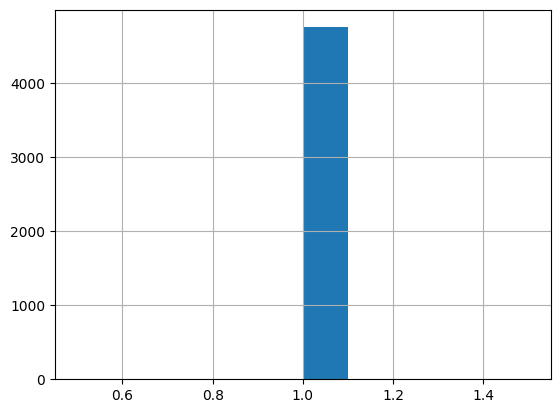

In [141]:
if len(data["PROCESSO_PRINCIPAL"].dropna()) > 0:
    pp_is_in_pag = data["PROCESSO_PRINCIPAL"].dropna().isin(data["PROCESS_NA_PAG"])
    pp_is_in_pro = data["PROCESSO_PRINCIPAL"].str.replace(".", "", regex=False).str.replace("-", "").dropna().isin(data["PROCESSO"])
    (pp_is_in_pag | pp_is_in_pro).astype(int).hist()

<AxesSubplot: >

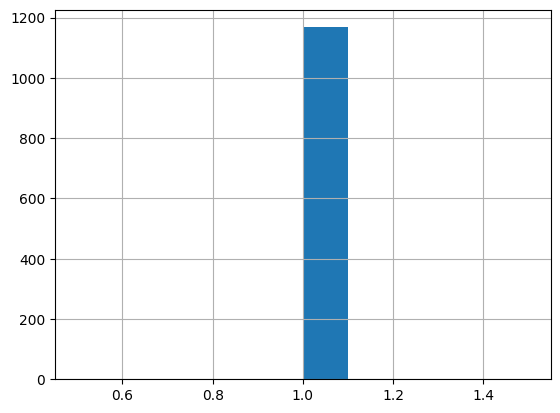

In [142]:
ap_is_in_pag = data["APENSO"].dropna().isin(data["PROCESS_NA_PAG"])
ap_is_in_pro = data["APENSO"].str.replace(".", "", regex=False).str.replace("-", "").dropna().isin(data["PROCESSO"])
(ap_is_in_pag | ap_is_in_pro).astype(int).hist()

In [143]:
missing = data["PROCESSO_PRINCIPAL"].dropna()[~(pp_is_in_pag | pp_is_in_pro)].to_list()
missing += data["APENSO"].dropna()[~(ap_is_in_pag | ap_is_in_pro)].to_list()
missing = sorted(list(set(missing)))

if len(missing) > 0:
    with open(missing_file, "w") as file:
        for m in missing:
            m = m.replace(".", "").replace("-", "")
            file.write(f"{m}\n")

print(f"Missing: {len(missing)} processos")

Missing: 0 processos


### Filters Data

#### Filtra Classes Especiais

In [144]:
data.shape

(45637, 23)

In [145]:
data = data[~data["CLASSE"].isin(error_class)]

In [146]:
data.shape

(45637, 23)

#### Fixes partes processo

In [147]:
def convert_partes_proc(x):
    default = {"rqt": ["error"], "adv_rqt": ["error"], "rqd": ["error"], "adv_rqd": ["error"]}
    
    if not isinstance(x, str):
        return pd.Series({k: str(v)[1:-1] for k, v in default.items()})
    else:
        x = x.lower()
    
    rqt_words = ['reqte', 'autor', 'embargte', 'impugte', 'reprtateat', "reclamante", "liqdteat", "excipte", 'impugdo', 'impugda',
                 'herdeiro', 'herdeira', 'invtante', "reconvinte", 'exeqte', 'imptte', "alimentado", "alimentada", "denunciante",
                 "opte",
                 
                 "requerente", "embargante", "exequente",
                
                "litisativ", "sucessora", "sucessor"]
    
    rqd_words = ['reqda', 'reqdo', "reconvindo", "reconvinda", "reclamado", "reclamada", 'imptdo', 'imptda', "exectdo", "exectda", 
                 "liqdtepas", "denunciado", "denunciada", "optos", "excpto", "excpta", "embargdo", "embargda",
                 
                 "requerido", "requerida", "embargado", "embargada", "executado", "executada",
                
                "litispas"]
    
    adv_words = ['advogada', 'advogado', 'repreleg']
    
    trad = {w: "rqt" for w in rqt_words}
    trad.update({w: "rqd" for w in rqd_words})
    trad.update({w: "adv" for w in adv_words})
    
    pattern = re.compile("(" + "|".join(rqt_words + rqd_words + adv_words) + ")")
    sides = ["rqt", "rqd"]

    result = {"rqt": [], "adv_rqt": [], "rqd": [], "adv_rqd": []}
    last_side, last_cat, last_end = None, None, 0
    try:
        for match in pattern.finditer(x):
            if last_cat is not None:
                last_side = last_cat if last_cat in sides else last_side
                cat = last_side if last_cat in sides else f"{last_cat}_{last_side}"
                result[cat].append(x[last_end: match.start()].strip("-:| "))
            last_cat, last_end = trad[match.group()], match.end()
        if last_cat is not None:
            last_side = last_cat if last_cat in sides else last_side
            cat = last_side if last_cat in sides else f"{last_cat}_{last_side}"
            result[cat].append(x[last_end: -1].strip("|-: "))
    except Exception as e:
        print(f"ERR {e} PARSING: {x}")
        return pd.Series({k: str(v)[1:-1] for k, v in default.items()})
    return pd.Series({k: str(v)[1:-1] for k, v in result.items()})

data = pd.concat([data, data["PARTES_PROCESSO"].apply(convert_partes_proc)], axis=1)

ERR 'adv_None' PARSING: advogada  renata zambrotti martins felipe vale | advogado  eduardo da silva marcelino | advogado  celso luiz hass da silva | advogada  renata daniela dos santos noia | advogada  renata daniela dos santos noia | advogado  valdir martins | advogado  valdir martins


In [148]:
data

,PROCESSO,CLASSE,SITUACAO,ASSUNTO,FORO,VARA,JUIZ,DISTRIBUICAO,CONTROLE,AREA,...,PROCESS_NA_PAG,PROCESSO_PRINCIPAL,APENSO,OUTROS_LINKS,TEVE_ARQUIVO,CAMINHO_ARQUIVO,rqt,adv_rqt,rqd,adv_rqd
0,00130517220238260002,Cumprimento de sentença (0013051-72.2023.8.26....,NaN,Indenização por Dano Moral,Foro Regional II - Santo Amaro,1ª Vara do Juizado Especial Cível,NaN,25/05/2023 às 12:49,2022/001185,Cível,...,NaN,1018004-96.2022.8.26.0002,NaN,NaN,NÃO,NaN,"'jocelino dos santos oliveira', 'ana claudia g...","'robert peter batista beserra', 'rafael leandr...",'liberty seguros s/a','marcio alexandre malfatti'
1,10037131620238260533,Procedimento Comum Cível,NaN,Seguro,Foro de Santa Bárbara d'Oeste,2ª Vara Cível,ELIZABETH SHALDERS DE OLIVEIRA ROXO,23/05/2023 às 18:01 - Livre,2023/001000,Cível,...,1003713-16.2023.8.26.0533,NaN,NaN,NaN,NÃO,NaN,'nivaldo rodrigues da silva','marcio antonio santana da silva',"'bradesco vida e previdencia s/a', 'banco brad...","'ana rita dos reis petraroli', 'paulo fernando..."
2,00005543720238260160,Cumprimento de sentença (0000554-37.2023.8.26....,NaN,Indenização por Dano Material,Foro de Descalvado,2ª Vara,NaN,23/08/2023 às 15:05,2022/000913,Cível,...,NaN,1001558-29.2022.8.26.0160,NaN,NaN,NÃO,NaN,"'faiani, borges e lopes - sociedade de'","'s', 'tatiana coelho lopes'",'allianz seguros s/a','elton carlos vieira'
3,10085947320228260047,Procedimento Comum Cível,Em grau de recurso | Tramitação prioritária,Provas em geral,Foro de Assis,3ª Vara Cível,ANDRE LUIZ DAMASCENO CASTRO LEITE,27/09/2022 às 11:01 - Livre,2022/001272,Cível,...,1008594-73.2022.8.26.0047,NaN,NaN,NaN,NÃO,NaN,'lidia paulo de assis','camilo venditto basso','mapfre seguros gerais s/a','keila christian zanatta manangão rodrigues ...
4,10011583720228260185,requer senha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NÃO,NaN,'error','error','error','error'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45632,10007523720188260094,Procedimento Comum Cível,Extinto,Seguro,Foro de Brodowski,Vara Única,DANIEL DIEGO CARRIJO,14/06/2018 às 16:03 - Livre,2018/001094,Cível,...,1000752-37.2018.8.26.0094,NaN,NaN,NaN,NÃO,NaN,'argo seguros brasil s/a','karina de almeida batistuci','lma transportes de cargas ltda','alessandro rufato'
45633,10002909020208260456,Procedimento Comum Cível,Tramitação prioritária,Indenização por Dano Moral,Foro de Pirapozinho,2ª Vara Judicial,Diego Mathias Marcussi,05/02/2020 às 16:31 - Livre,2020/000189,Cível,...,1000290-90.2020.8.26.0456,NaN,NaN,NaN,NÃO,NaN,'donizeti machado dos santos',"'danilo tochikazu menossi sakamoto', 'celio pa...",'sudamerica clube de serviços','andre luiz lunardon | denunlide sethi ativ...
45634,10037802120178260038,Procedimento Comum Cível,Extinto,Acidente de Trânsito,Foro de Araras,3ª Vara Cível,ANTONIO CESAR HILDEBRAND E SILVA,04/08/2017 às 12:49 - Direcionada,2017/001313,Cível,...,1003780-21.2017.8.26.0038,NaN,NaN,NaN,NÃO,NaN,'robson cristiano krepiski formoso',"'roberto benetti filho', 'victor jose petrarol...",,
45635,30083187620138260482,Cumprimento Provisório de Sentença (3008318-76...,Extinto,ASSUNTOS ANTIGOS DO SAJ - Assunto não informado,Foro de Presidente Prudente,2ª Vara Cível,NaN,04/09/2013 às 14:06,2010/001451,Cível,...,NaN,0019779-04.2010.8.26.0482,NaN,NaN,NÃO,NaN,'edna aparecida palombino',"'daniel reus de souza', 'osvaldo simoes junior'","'josé roberto tiezzi', 'aparecida amato tiezzi...","'angélica luciá carlini', 'marli niccioli', 'm..."


In [149]:
def is_company_name(name, preset_companies: list = None):
    if preset_companies is None:
        preset_companies = []
    
    keywords = ["ltda", "ltda.", "s/a", "s.a.", "sa", "inc", "group", "agencia", "companhia", "corporation", 
                "consultoria", "viagens", "turismo", "transportes", "transporte", "comércio", "serviços", 
                "seguros", "empreendimentos", "prefeitura", "creditórios", "investimentos", "investimento"]
    
    name = name.lower().replace("'", "")
    for keyword in (keywords + preset_companies):
        if f"{keyword}" in name.split(" "):
            return True
    return False

data["Qualificação"] = data["rqt"].apply(lambda x: is_company_name(x))
data["Qualificação"] = np.where(data["Qualificação"], "Pessoa Juridica", "Pessoa Fisica")

In [151]:
data[["rqt", "Qualificação"]].sample(5)

,rqt,Qualificação
32832,'Maria Aparecida Augusto Maria',Pessoa Fisica
43742,-,-
17274,"'Beatriz Vitória Gomes De Figueiredo', 'Daisi ...",Pessoa Fisica
33479,'Maria Gonçalves Dias Primon',Pessoa Fisica
30617,-,-


#### Creates Spreadsheet

In [150]:
# Derivative columns
data["Possui Incidentes"] = (data["INCIDENTE"].str.len() > 1)
data.loc[~data["Possui Incidentes"], "INCIDENTE"] = "None"
data["Cumprimento de Sentença?"] = data["INCIDENTE"].str.lower().str.contains("cumprimento")
data["Juizado Especial"] = data["VARA"].str.contains("Especial")

# Text Fixes
data["JUIZ"] = data["JUIZ"].str.title()
data["rqt"] = data["rqt"].str.title()
data["ASSUNTO"] = data["ASSUNTO"].str.title()

# Removes residues from special cases
data.loc[data["CLASSE"].isin(special_class), data.columns[~data.columns.isin(["PROCESSO", "CLASSE"])]] = "-"

# Assembles final df
required_fields = {"PROCESSO": "Processo", "CLASSE": "Ação", "ASSUNTO": "Assunto", "VALOR_ACAO": "Valor da Causa", 
                   "rqd": "Requerido", "rqt": "Requerente", "Qualificação": "Qualificação",  
                   "JUIZ": "Juiz", "FORO": "Local", "VARA": "Vara", "Juizado Especial": "Juizado Especial", 
                   "DISTRIBUICAO": "Data de distribuição", "SITUACAO": "Situação processual", 
                   "LAST_MOV_DT": "Data da última movimentação", "LAST_MOV": "Última movimentação",  
                   "Possui Incidentes": "Possui Incidentes?", "INCIDENTE": "Quais Incidentes?",
                   "Cumprimento de Sentença?": "Cumprimento de Sentença?", "URL_LINK": "Url"} 
final_df = data[required_fields.keys()].rename(required_fields, axis=1)

In [152]:
final_df.sample(5)

,Processo,Ação,Assunto,Valor da Causa,Requerido,Requerente,Qualificação,Juiz,Local,Vara,Juizado Especial,Data de distribuição,Situação processual,Data da última movimentação,Última movimentação,Possui Incidentes?,Quais Incidentes?,Cumprimento de Sentença?,Url
3236,00080349620238260344(50031349620234036345),Procedimento Comum Cível,Indenização Por Dano Material,"R$ 66.818,90",'akad seguros s/a',"'Timnate Heres Costa', 'Juliana Batista Costa'",Pessoa Fisica,Valdecir Mendes De Oliveira,Foro de Marília,4ª Vara Cível,False,26/09/2023 às 12:13 - Livre,NaN,28/03/2024,"Petição Juntada, Nº Protocolo: WMIA.24.7006154...",False,None,False,https://esaj.tjsp.jus.br/cpopg/show.do?process...
39937,10074134120218260348,requer senha,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
12058,00021794320238260084,Cumprimento de sentença (0002179-43.2023.8.26....,Indenização Por Dano Material,"R$ 3.299,57",'mapfre seguros gerais s/a',"'Abramides, Gonçalves E'",Pessoa Fisica,Viviani Dourado Berton Chaves,Foro Regional de Vila Mimosa,2ª Vara,False,29/08/2023 às 11:42,NaN,03/04/2024,"Petição Juntada, Nº Protocolo: WAS1.24.7003724...",False,None,False,https://esaj.tjsp.jus.br/cpopg/show.do?process...
28295,10536492420188260100,Procedimento Comum Cível,Seguro,"R$ 13.500,00",'porto seguro companhia de seguros gerais','Ione Dos Santos',Pessoa Fisica,Pedro Rebello Bortolini,Foro Central Cível,8ª Vara Cível,False,21/05/2018 às 16:09 - Livre,Suspenso,10/10/2019,Arquivado Provisoriamente,False,None,False,https://esaj.tjsp.jus.br/cpopg/show.do?process...
45425,10152569620198260002,Procedimento Comum Cível,Acidente De Trânsito,"R$ 30.000,00","'vip transporte urbano ltda', 'american life c...",'Ariclesio Jose Da Silva',Pessoa Fisica,Sergio Ludovico Martins,Foro Regional II - Santo Amaro,7ª Vara Cível,False,26/03/2019 às 10:40 - Livre,Extinto,09/06/2020,Arquivado Definitivamente,True,10/03/2020 Cumprimento de sentença (0006708-6...,True,https://esaj.tjsp.jus.br/cpopg/show.do?process...


In [153]:
final_df.to_excel(out_file, engine="xlsxwriter")